In [1]:
"""Dependencies"""

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use('ggplot')

In [2]:
# Import Gold data in panda and passed to a variable name "x1"
x1 = pd.read_csv("Gold.csv", parse_dates = True, index_col=0)

# checking 1st and last 5 rows
x1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,17.9375,17.9375,17.6875,17.6875,14.105929,557700
2000-01-03,17.5625,18.1875,17.4375,17.6875,14.105929,1509900
2000-01-04,17.3125,17.6875,17.1250,17.4375,13.906553,1787100
2000-01-05,17.5625,17.8750,17.4375,17.7500,14.155771,1285100
2000-01-06,17.7500,17.8125,17.5000,17.7500,14.155771,1139300
...,...,...,...,...,...,...
2019-05-23,12.0200,12.2400,11.9600,11.9600,11.919285,13787100
2019-05-24,12.0000,12.0000,11.7500,11.9500,11.909319,11025500
2019-05-28,11.7000,11.8500,11.6500,11.7400,11.700034,10656200


In [3]:
# renaming close column
x1= x1.rename(columns={'Close': 'Gold'})

# extracting the newly created Gold column
x1 = pd.DataFrame(x1.Gold)

# last 5 rows
x1.tail()

,Gold
Date,
2019-05-23,11.96
2019-05-24,11.95
2019-05-28,11.74
2019-05-29,11.75
2019-05-30,11.79


In [4]:
# Import Silver data in panda and passed to a variable name x2
x2 = pd.read_csv("Silver.csv", parse_dates = True, index_col=0)

# renaming price column
x2= x2.rename(columns={'Price': 'Silver'})

# extracting the newly created Gold column
x2 = pd.DataFrame(x2.Silver)

# last 5 rows
x2.tail()

,Silver
Date,
2018-01-01,17.070
2018-01-02,17.121
2018-01-03,17.185
2018-01-04,17.189
2018-01-05,17.205


In [5]:
# Import Oil data in panda and passed to a variable name x3
x3 = pd.read_csv("Crude_Oil.csv", parse_dates = True, index_col=0)

# renaming price column
x3= x3.rename(columns={'Price': 'Oil'})

# extracting the newly created Gold column
x3 = pd.DataFrame(x3.Oil)

# last 5 rows
x3.tail()

,Oil
Date,
2019-05-27,59.16
2019-05-28,59.14
2019-05-29,58.81
2019-05-30,56.59
2019-05-31,55.09


In [6]:
# combining all 3 dataframes in one
df = pd.concat([x1.Gold, x2.Silver, x3.Oil], axis=1, sort=False)

# top and last 5 rows
df

,Gold,Silver,Oil
Date,,,
1999-12-31,17.6875,NaN,NaN
2000-01-03,17.6875,NaN,NaN
2000-01-04,17.4375,5.335,25.55
2000-01-05,17.7500,5.170,24.91
2000-01-06,17.7500,5.127,24.78
...,...,...,...
2019-05-27,NaN,NaN,59.16
2019-05-28,11.7400,NaN,59.14
2019-05-29,11.7500,NaN,58.81


In [7]:
# checking rows and columns
df.shape

(5396, 3)

In [8]:
# checking missing data (NaN)
df.isnull().sum()

Gold      513
Silver    396
Oil       456
dtype: int64

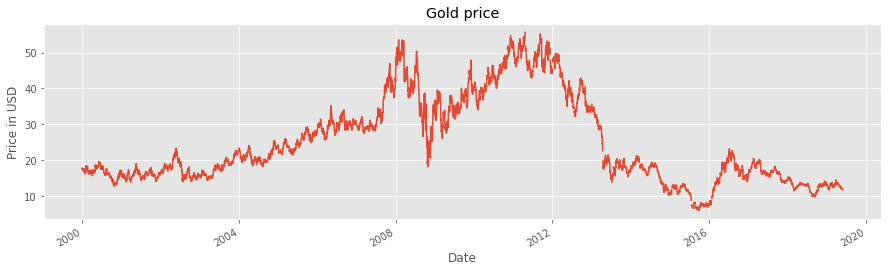

In [9]:
# visualization ('Gold price')
df.Gold.plot(figsize = (15,4))
plt.title('Gold price')
plt.ylabel("Price in USD")
plt.show()

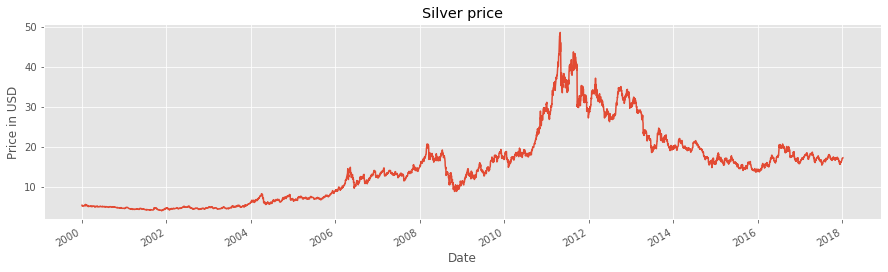

In [10]:
# visualization ('Silver price')
df.Silver.plot(figsize=(15,4))
plt.title('Silver price')
plt.ylabel("Price in USD")
plt.show()

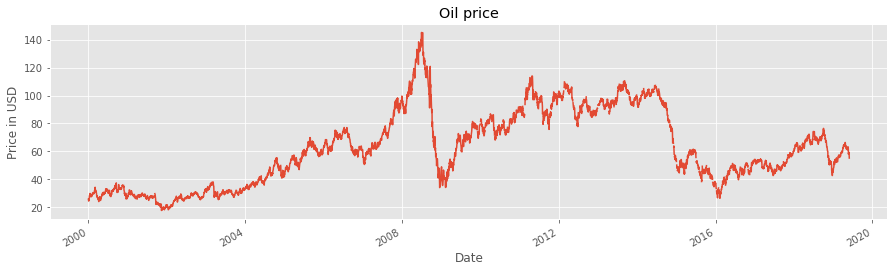

In [11]:
# visualization ('Oil price')
df.Oil.plot(figsize=(15,4))
plt.title('Oil price')
plt.ylabel("Price in USD")
plt.show()

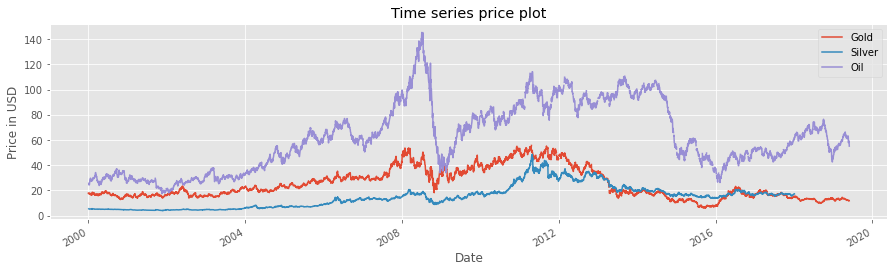

In [12]:
# Combine plot
df.plot(figsize=(15,4))
plt.title('Time series price plot')
plt.ylabel("Price in USD")
plt.show()

In [13]:
# collecting data from 2000 - 2017
df = df.loc['2000-01-01' : '2017-12-31']
print(df.info()); print()

# checking last 5 values
print(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5020 entries, 2000-01-03 to 2017-12-29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gold    4528 non-null   float64
 1   Silver  4995 non-null   float64
 2   Oil     4565 non-null   float64
dtypes: float64(3)
memory usage: 156.9 KB
None

             Gold  Silver    Oil
Date                            
2017-12-25    NaN  16.390  58.59
2017-12-26  14.57  16.520  59.97
2017-12-27  14.49  16.619  59.64
2017-12-28  14.45  16.832  59.84
2017-12-29  14.47  17.060  60.42


### Filling missing values: fillna
fillna() can fill-in NA values with non-NA data in a couple of ways, which we illustrate:

In [14]:
df2 = df.copy() # copying original dataframe

# fill na with 0 value
df2.fillna(0, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5020 entries, 2000-01-03 to 2017-12-29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gold    5020 non-null   float64
 1   Silver  5020 non-null   float64
 2   Oil     5020 non-null   float64
dtypes: float64(3)
memory usage: 156.9 KB


### Fill gaps forward or backward
Using the same filling arguments as reindexing, we can propagate non-NA values forward or backward:

In [15]:
df3 = df.copy() # copy the original data frame

"""
Original data frame is copied here so that we can retain the original data frame
"""

# fill na usinf forward fill method
df3.fillna(method='ffill', inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5020 entries, 2000-01-03 to 2017-12-29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gold    5020 non-null   float64
 1   Silver  5019 non-null   float64
 2   Oil     5019 non-null   float64
dtypes: float64(3)
memory usage: 156.9 KB


In [16]:
df4 = df.copy() # copying the original data frame

# fill na using backfill method
df4.fillna(method='bfill', inplace=True)
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5020 entries, 2000-01-03 to 2017-12-29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gold    5020 non-null   float64
 1   Silver  5020 non-null   float64
 2   Oil     5020 non-null   float64
dtypes: float64(3)
memory usage: 156.9 KB


### Interpolation
Interpolation is a simple mathematical concept which is achieved by using other values that are located in sequence with the missing value.

In [17]:
df5 = df.copy() # copying the original data frame
print(df5.interpolate()); print()
print(df5.interpolate().count())

               Gold  Silver    Oil
Date                              
2000-01-03  17.6875     NaN    NaN
2000-01-04  17.4375   5.335  25.55
2000-01-05  17.7500   5.170  24.91
2000-01-06  17.7500   5.127  24.78
2000-01-07  17.3125   5.150  24.22
...             ...     ...    ...
2017-12-25  14.5200  16.390  58.59
2017-12-26  14.5700  16.520  59.97
2017-12-27  14.4900  16.619  59.64
2017-12-28  14.4500  16.832  59.84
2017-12-29  14.4700  17.060  60.42

[5020 rows x 3 columns]

Gold      5020
Silver    5019
Oil       5019
dtype: int64


In [18]:
# remove NaN/missing values by dropping all na
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4502 entries, 2000-01-04 to 2017-12-29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gold    4502 non-null   float64
 1   Silver  4502 non-null   float64
 2   Oil     4502 non-null   float64
dtypes: float64(3)
memory usage: 140.7 KB


In [19]:
# statistical summary
df.describe()

,Gold,Silver,Oil
count,4502.000000,4502.000000,4502.000000
mean,25.883869,14.865879,62.118974
std,11.911903,8.982367,27.532674
min,5.940000,4.026000,17.450000
25%,16.562500,6.652750,37.262500
50%,21.049999,14.428000,58.125000
75%,34.500000,18.609000,86.727500
max,55.630001,48.584000,145.290000


We can see that mean and standard deviation for each variable.

#### Standard Deviation
Standard Deviation is a measure of how spread out numbers are. A low standard deviation indicates that the data points tend to be very close to the mean. A high standard deviation indicates that the data points are spread out over a large range of values. It is in fact the square root of the Variance.

#### Variance
The Variance is the average of the squared differences from the Mean.